In [1]:
import sys
sys.path.append('../src') 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import tensorflow as tf
from gait.utils import get_overlap_data_all_sessions,  split_test_train_by_subjects, get_overlap_data_all_sessions
from gait.training import train_2dcnn_lstm_model, build_final_cnn_lstm
from gait.evalution import save_history, save_test_history, save_accuracy_loss_figure, save_confusion_matrix_figure, compute_validations_predictions, save_classification_report

In [2]:
build_final_cnn_lstm(12, 5)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, None, 21, 1, 64)  9280      
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, None, 21, 1, 64)  256       
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, None, 21, 1, 64)  0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, None, 21, 1, 64)  0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, None, 64)         0

In [3]:
def compute_resultant_acceleration(X):
    return np.sqrt(X[:,:,0] **2 + X[:,:,1] ** 2 + X[:,:,2] ** 2)

def compute_resultant_gyro(X):
    return np.sqrt(X[:,:,3] **2 + X[:,:,4] ** 2 + X[:,:,5] ** 2)

def compute_resultant_angle(X):
    return np.sqrt(X[:,:,6] **2 + X[:,:,7] ** 2 + X[:,:,8] ** 2)

def get_std_values(X, channel):
    return np.std(X[:, :, channel], axis=1)

def get_mean_values(X, channel):
    return np.mean(X[:, :, channel], axis=1)

def get_max_values(X, channel):
    return np.max(X[:, :, channel], axis=1)

def get_median_values(X, channel):
    return np.median(X[:, :, channel], axis=1)


def get_statistic_feature_all_channels(X):
    statistic_features = []
    for channel in range(9,12):
        statistic_features.append(get_std_values(X, channel))
        statistic_features.append(get_mean_values(X, channel))
        statistic_features.append(get_max_values(X, channel))
        statistic_features.append(get_median_values(X, channel))

    return np.vstack(statistic_features).T

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
unique subjects ['0DXZFsYOfgqsYe0Z' '0UXFxu10k0En1vDK' '1ZstYhEKzKKfGnMW'
 'AlOXZjo87HHkXeaa' 'I1TuySg6fbJ0xeXt' 'KNmC3LADpLyH5qJA'
 'KPJOUYXzpivbLfsH' 'LdH95bTaViXIdDBZ' 'NKdnm6cN3KKAx7R4'
 'QFxq3HxMCbzs6bCt' 'WAb2Ztvv2ux95P4Q' 'YbJVcb4vFFjKKlfe'
 'bQsRwKxgJiXTzo6P' 'c9EB3mOQckRCc8Bz' 'csujYZktn88ftTTv'
 'eqUcL0HkHZfDt0Xs' 'ewpnQDEzR8hTqPRY' 'kPNKVxgIznp3Vskg'
 'psiuhPJmLIa2wC4u' 'qyP4saGxcV9UfeQI' 'zOmNofnVfbR21Y7n']
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task

/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
76/76 [==============================] - 7s 24ms/step - loss: 1.3923 - accuracy: 0.4365 - val_loss: 1.4391 - val_accuracy: 0.3384
Epoch 2/100
76/76 [==============================] - 1s 15ms/step - loss: 1.1042 - accuracy: 0.5325 - val_loss: 1.0429 - val_accuracy: 0.6234
Epoch 3/100
76/76 [==============================] - 1s 16ms/step - loss: 0.9361 - accuracy: 0.6475 - val_loss: 0.8152 - val_accuracy: 0.7002
Epoch 4/100
76/76 [==============================] - 1s 15ms/step - loss: 0.8105 - accuracy: 0.7007 - val_loss: 0.6982 - val_accuracy: 0.7516
Epoch 5/100
76/76 [==============================] - 1s 17ms/step - loss: 0.7292 - accuracy: 0.7288 - val_loss: 0.6616 - val_accuracy: 0.7664
Epoch 6/100
76/76 [==============================] - 1s 16ms/step - loss: 0.6674 - accuracy: 0.7566 - val_loss: 0.6387 - val_accuracy: 0.7796
Epoch 7/100
76/76 [==============================] - 1s 17ms/step - loss: 0.6185 - accuracy: 0.7720 - val_loss: 0.5998 - val_accuracy: 0.8026
Epoch 

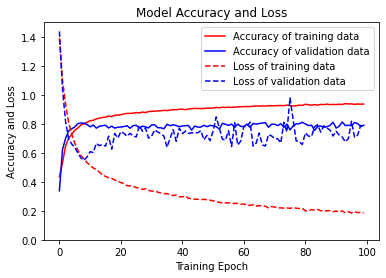

--------CLASSIFICATION REPORT--------
              precision    recall  f1-score   support

           1       0.98      0.99      0.98       876
           2       0.95      0.67      0.79      1274
           3       0.70      0.83      0.76       735
           4       0.74      0.88      0.80       458
           5       0.67      0.79      0.73       753

    accuracy                           0.81      4096
   macro avg       0.81      0.83      0.81      4096
weighted avg       0.84      0.81      0.81      4096

-------------------------------------


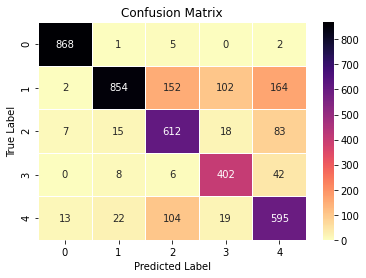

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
unique subjects ['0DXZFsYOfgqsYe0Z' '0UXFxu10k0En1vDK' '1ZstYhEKzKKfGnMW'
 'AlOXZjo87HHkXeaa' 'I1TuySg6fbJ0xeXt' 'KNmC3LADpLyH5qJA'
 'KPJOUYXzpivbLfsH' 'LdH95bTaViXIdDBZ' 'NKdnm6cN3KKAx7R4'
 'QFxq3HxMCbzs6bCt' 'WAb2Ztvv2ux95P4Q' 'YbJVcb4vFFjKKlfe'
 'bQsRwKxgJiXTzo6P' 'c9EB3mOQckRCc8Bz' 'csujYZktn88ftTTv'
 'eqUcL0HkHZfDt0Xs' 'ewpnQDEzR8hTqPRY' 'kPNKVxgIznp3Vskg'
 'psiuhPJmLIa2wC4u' 'qyP4saGxcV9UfeQI' 'zOmNofnVfbR21Y7n']
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_12 (TimeDi  (None, None, 21, 1, 64)  9280      
 stributed)                                                      
                                                                 
 time_distributed_13 (TimeDi  (None, None, 21, 1, 64)  256       
 stributed)                                              

/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
83/83 [==============================] - 7s 46ms/step - loss: 1.4568 - accuracy: 0.4287 - val_loss: 1.2904 - val_accuracy: 0.4246
Epoch 2/100
83/83 [==============================] - 2s 26ms/step - loss: 1.1257 - accuracy: 0.5794 - val_loss: 0.9541 - val_accuracy: 0.5876
Epoch 3/100
83/83 [==============================] - 2s 27ms/step - loss: 0.9060 - accuracy: 0.6570 - val_loss: 0.6785 - val_accuracy: 0.7323
Epoch 4/100
83/83 [==============================] - 2s 28ms/step - loss: 0.7887 - accuracy: 0.6917 - val_loss: 0.5941 - val_accuracy: 0.7730
Epoch 5/100
83/83 [==============================] - 2s 26ms/step - loss: 0.7296 - accuracy: 0.7133 - val_loss: 0.5618 - val_accuracy: 0.7928
Epoch 6/100
83/83 [==============================] - 2s 25ms/step - loss: 0.6834 - accuracy: 0.7378 - val_loss: 0.5675 - val_accuracy: 0.7898
Epoch 7/100
83/83 [==============================] - 2s 27ms/step - loss: 0.6483 - accuracy: 0.7520 - val_loss: 0.5408 - val_accuracy: 0.7963
Epoch 

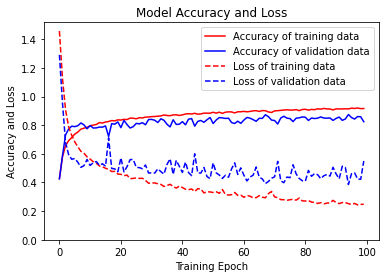

--------CLASSIFICATION REPORT--------
              precision    recall  f1-score   support

           1       0.98      0.96      0.97       799
           2       0.71      0.84      0.77       904
           3       0.68      0.72      0.70       877
           4       0.85      0.71      0.77      1015
           5       0.79      0.78      0.78      1344

    accuracy                           0.79      4939
   macro avg       0.80      0.80      0.80      4939
weighted avg       0.80      0.79      0.79      4939

-------------------------------------


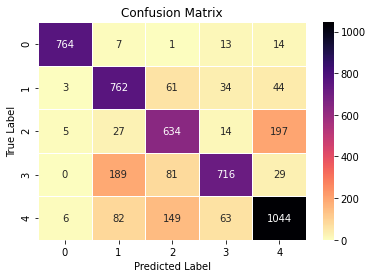

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
unique subjects ['0DXZFsYOfgqsYe0Z' '0UXFxu10k0En1vDK' '1ZstYhEKzKKfGnMW'
 'AlOXZjo87HHkXeaa' 'I1TuySg6fbJ0xeXt' 'KNmC3LADpLyH5qJA'
 'KPJOUYXzpivbLfsH' 'LdH95bTaViXIdDBZ' 'NKdnm6cN3KKAx7R4'
 'QFxq3HxMCbzs6bCt' 'WAb2Ztvv2ux95P4Q' 'YbJVcb4vFFjKKlfe'
 'bQsRwKxgJiXTzo6P' 'c9EB3mOQckRCc8Bz' 'csujYZktn88ftTTv'
 'eqUcL0HkHZfDt0Xs' 'ewpnQDEzR8hTqPRY' 'kPNKVxgIznp3Vskg'
 'psiuhPJmLIa2wC4u' 'qyP4saGxcV9UfeQI' 'zOmNofnVfbR21Y7n']
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_18 (TimeDi  (None, None, 21, 1, 64)  9280      
 stributed)                                                      
                                                                 
 time_distributed_19 (TimeDi  (None, None, 21, 1, 64)  256       
 stributed)                                              

/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
96/96 [==============================] - 9s 33ms/step - loss: 1.4153 - accuracy: 0.4275 - val_loss: nan - val_accuracy: 0.4254
Epoch 2/100
96/96 [==============================] - 2s 24ms/step - loss: 1.0569 - accuracy: 0.5929 - val_loss: nan - val_accuracy: 0.6206
Epoch 3/100
96/96 [==============================] - 2s 25ms/step - loss: 0.8591 - accuracy: 0.6770 - val_loss: nan - val_accuracy: 0.7388
Epoch 4/100
96/96 [==============================] - 2s 24ms/step - loss: 0.7439 - accuracy: 0.7235 - val_loss: nan - val_accuracy: 0.7646
Epoch 5/100
96/96 [==============================] - 2s 25ms/step - loss: 0.6787 - accuracy: 0.7462 - val_loss: nan - val_accuracy: 0.8022
Epoch 6/100
96/96 [==============================] - 2s 24ms/step - loss: 0.6252 - accuracy: 0.7716 - val_loss: nan - val_accuracy: 0.8106
Epoch 7/100
96/96 [==============================] - 2s 25ms/step - loss: 0.5878 - accuracy: 0.7839 - val_loss: nan - val_accuracy: 0.8071
Epoch 8/100
96/96 [========

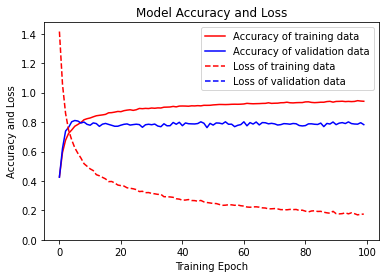

--------CLASSIFICATION REPORT--------
              precision    recall  f1-score   support

           1       0.98      0.97      0.98      1082
           2       0.86      0.80      0.83      1284
           3       0.63      0.89      0.74       738
           4       0.88      0.75      0.81       743
           5       0.82      0.76      0.79      1186

    accuracy                           0.83      5033
   macro avg       0.84      0.83      0.83      5033
weighted avg       0.85      0.83      0.84      5033

-------------------------------------


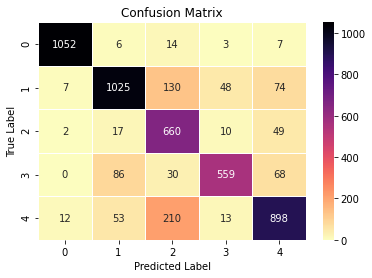

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
unique subjects ['0DXZFsYOfgqsYe0Z' '0UXFxu10k0En1vDK' '1ZstYhEKzKKfGnMW'
 'AlOXZjo87HHkXeaa' 'I1TuySg6fbJ0xeXt' 'KNmC3LADpLyH5qJA'
 'KPJOUYXzpivbLfsH' 'LdH95bTaViXIdDBZ' 'NKdnm6cN3KKAx7R4'
 'QFxq3HxMCbzs6bCt' 'WAb2Ztvv2ux95P4Q' 'YbJVcb4vFFjKKlfe'
 'bQsRwKxgJiXTzo6P' 'c9EB3mOQckRCc8Bz' 'csujYZktn88ftTTv'
 'eqUcL0HkHZfDt0Xs' 'ewpnQDEzR8hTqPRY' 'kPNKVxgIznp3Vskg'
 'psiuhPJmLIa2wC4u' 'qyP4saGxcV9UfeQI' 'zOmNofnVfbR21Y7n']
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_24 (TimeDi  (None, None, 21, 1, 64)  9280      
 stributed)                                                      
                                                                 
 time_distributed_25 (TimeDi  (None, None, 21, 1, 64)  256       
 stributed)                                              

/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
80/80 [==============================] - 8s 33ms/step - loss: 1.4370 - accuracy: 0.4652 - val_loss: 1.5180 - val_accuracy: 0.3217
Epoch 2/100
80/80 [==============================] - 2s 26ms/step - loss: 1.1419 - accuracy: 0.5399 - val_loss: 1.1475 - val_accuracy: 0.4155
Epoch 3/100
80/80 [==============================] - 2s 25ms/step - loss: 0.9754 - accuracy: 0.6078 - val_loss: 0.8942 - val_accuracy: 0.5508
Epoch 4/100
80/80 [==============================] - 2s 25ms/step - loss: 0.8503 - accuracy: 0.6718 - val_loss: 0.7565 - val_accuracy: 0.6187
Epoch 5/100
80/80 [==============================] - 2s 26ms/step - loss: 0.7455 - accuracy: 0.7196 - val_loss: 0.6730 - val_accuracy: 0.6956
Epoch 6/100
80/80 [==============================] - 2s 24ms/step - loss: 0.6708 - accuracy: 0.7545 - val_loss: 0.6785 - val_accuracy: 0.6964
Epoch 7/100
80/80 [==============================] - 2s 27ms/step - loss: 0.6154 - accuracy: 0.7773 - val_loss: 0.6246 - val_accuracy: 0.7689
Epoch 

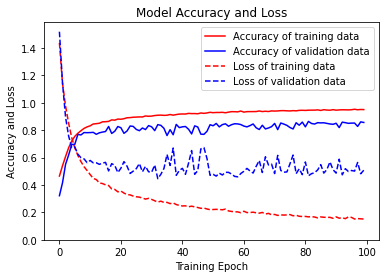

--------CLASSIFICATION REPORT--------
              precision    recall  f1-score   support

           1       0.89      0.94      0.92      1875
           2       0.70      0.60      0.65      2760
           3       0.58      0.73      0.65      1781
           4       0.56      0.66      0.60      1346
           5       0.73      0.63      0.67      2792

    accuracy                           0.70     10554
   macro avg       0.69      0.71      0.70     10554
weighted avg       0.70      0.70      0.70     10554

-------------------------------------


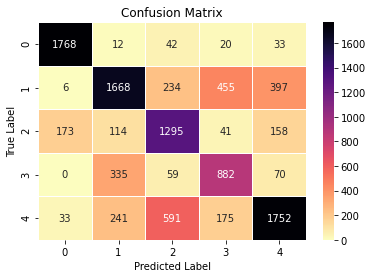

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
unique subjects ['0DXZFsYOfgqsYe0Z' '0UXFxu10k0En1vDK' '1ZstYhEKzKKfGnMW'
 'AlOXZjo87HHkXeaa' 'I1TuySg6fbJ0xeXt' 'KNmC3LADpLyH5qJA'
 'KPJOUYXzpivbLfsH' 'LdH95bTaViXIdDBZ' 'NKdnm6cN3KKAx7R4'
 'QFxq3HxMCbzs6bCt' 'WAb2Ztvv2ux95P4Q' 'YbJVcb4vFFjKKlfe'
 'bQsRwKxgJiXTzo6P' 'c9EB3mOQckRCc8Bz' 'csujYZktn88ftTTv'
 'eqUcL0HkHZfDt0Xs' 'ewpnQDEzR8hTqPRY' 'kPNKVxgIznp3Vskg'
 'psiuhPJmLIa2wC4u' 'qyP4saGxcV9UfeQI' 'zOmNofnVfbR21Y7n']
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_30 (TimeDi  (None, None, 21, 1, 64)  9280      
 stributed)                                                      
                                                                 
 time_distributed_31 (TimeDi  (None, None, 21, 1, 64)  256       
 stributed)                                              

/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
118/118 [==============================] - 10s 31ms/step - loss: 1.2435 - accuracy: 0.5186 - val_loss: 1.2286 - val_accuracy: 0.4247
Epoch 2/100
118/118 [==============================] - 3s 26ms/step - loss: 0.8712 - accuracy: 0.6555 - val_loss: 0.7782 - val_accuracy: 0.6252
Epoch 3/100
118/118 [==============================] - 3s 25ms/step - loss: 0.7320 - accuracy: 0.7099 - val_loss: 0.7185 - val_accuracy: 0.6568
Epoch 4/100
118/118 [==============================] - 3s 26ms/step - loss: 0.6622 - accuracy: 0.7401 - val_loss: 0.6945 - val_accuracy: 0.6852
Epoch 5/100
118/118 [==============================] - 3s 26ms/step - loss: 0.6176 - accuracy: 0.7621 - val_loss: 0.6478 - val_accuracy: 0.7202
Epoch 6/100
118/118 [==============================] - 3s 25ms/step - loss: 0.5771 - accuracy: 0.7872 - val_loss: 0.6114 - val_accuracy: 0.7552
Epoch 7/100
118/118 [==============================] - 3s 26ms/step - loss: 0.5365 - accuracy: 0.8013 - val_loss: 0.6151 - val_accuracy

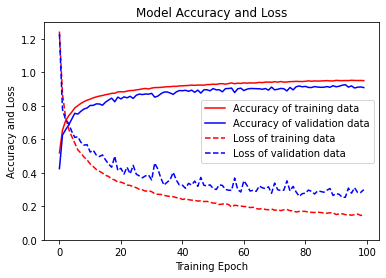

--------CLASSIFICATION REPORT--------
              precision    recall  f1-score   support

           1       0.94      0.96      0.95      1253
           2       0.77      0.71      0.74      1843
           3       0.72      0.82      0.77      1359
           4       0.83      0.78      0.80      1741
           5       0.81      0.82      0.82      2189

    accuracy                           0.81      8385
   macro avg       0.81      0.82      0.82      8385
weighted avg       0.81      0.81      0.81      8385

-------------------------------------


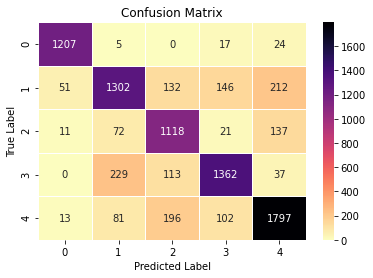

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
unique subjects ['0DXZFsYOfgqsYe0Z' '0UXFxu10k0En1vDK' '1ZstYhEKzKKfGnMW'
 'AlOXZjo87HHkXeaa' 'I1TuySg6fbJ0xeXt' 'KNmC3LADpLyH5qJA'
 'KPJOUYXzpivbLfsH' 'LdH95bTaViXIdDBZ' 'NKdnm6cN3KKAx7R4'
 'QFxq3HxMCbzs6bCt' 'WAb2Ztvv2ux95P4Q' 'YbJVcb4vFFjKKlfe'
 'bQsRwKxgJiXTzo6P' 'c9EB3mOQckRCc8Bz' 'csujYZktn88ftTTv'
 'eqUcL0HkHZfDt0Xs' 'ewpnQDEzR8hTqPRY' 'kPNKVxgIznp3Vskg'
 'psiuhPJmLIa2wC4u' 'qyP4saGxcV9UfeQI' 'zOmNofnVfbR21Y7n']
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_36 (TimeDi  (None, None, 21, 1, 64)  9280      
 stributed)                                                      
                                                                 
 time_distributed_37 (TimeDi  (None, None, 21, 1, 64)  256       
 stributed)                                              

/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
153/153 [==============================] - 9s 29ms/step - loss: 1.3285 - accuracy: 0.4810 - val_loss: 1.1263 - val_accuracy: 0.5107
Epoch 2/100
153/153 [==============================] - 4s 25ms/step - loss: 0.9774 - accuracy: 0.6085 - val_loss: 0.7623 - val_accuracy: 0.6568
Epoch 3/100
153/153 [==============================] - 4s 25ms/step - loss: 0.7994 - accuracy: 0.6777 - val_loss: 0.7306 - val_accuracy: 0.7021
Epoch 4/100
153/153 [==============================] - 4s 25ms/step - loss: 0.6925 - accuracy: 0.7388 - val_loss: 0.7162 - val_accuracy: 0.7226
Epoch 5/100
153/153 [==============================] - 4s 25ms/step - loss: 0.6023 - accuracy: 0.7820 - val_loss: 0.6979 - val_accuracy: 0.7319
Epoch 6/100
153/153 [==============================] - 4s 25ms/step - loss: 0.5498 - accuracy: 0.8021 - val_loss: 0.6807 - val_accuracy: 0.7431
Epoch 7/100
153/153 [==============================] - 4s 26ms/step - loss: 0.5011 - accuracy: 0.8231 - val_loss: 0.7278 - val_accuracy:

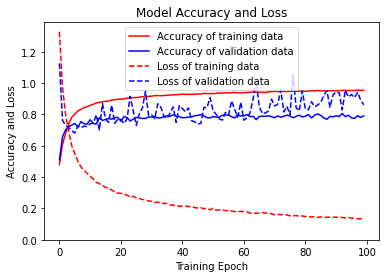

--------CLASSIFICATION REPORT--------
              precision    recall  f1-score   support

           1       0.79      0.99      0.88      1331
           2       0.92      0.85      0.88      1947
           3       0.86      0.80      0.83      1888
           4       0.76      0.76      0.76      1105
           5       0.86      0.82      0.84      1557

    accuracy                           0.85      7828
   macro avg       0.84      0.85      0.84      7828
weighted avg       0.85      0.85      0.84      7828

-------------------------------------


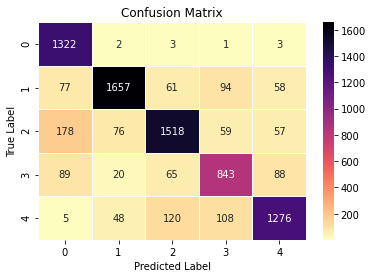

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
unique subjects ['0DXZFsYOfgqsYe0Z' '0UXFxu10k0En1vDK' '1ZstYhEKzKKfGnMW'
 'AlOXZjo87HHkXeaa' 'I1TuySg6fbJ0xeXt' 'KNmC3LADpLyH5qJA'
 'KPJOUYXzpivbLfsH' 'LdH95bTaViXIdDBZ' 'NKdnm6cN3KKAx7R4'
 'QFxq3HxMCbzs6bCt' 'WAb2Ztvv2ux95P4Q' 'YbJVcb4vFFjKKlfe'
 'bQsRwKxgJiXTzo6P' 'c9EB3mOQckRCc8Bz' 'csujYZktn88ftTTv'
 'eqUcL0HkHZfDt0Xs' 'ewpnQDEzR8hTqPRY' 'kPNKVxgIznp3Vskg'
 'psiuhPJmLIa2wC4u' 'qyP4saGxcV9UfeQI' 'zOmNofnVfbR21Y7n']
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_42 (TimeDi  (None, None, 21, 1, 64)  9280      
 stributed)                                                      
                                                                 
 time_distributed_43 (TimeDi  (None, None, 21, 1, 64)  256       
 stributed)                                              

/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
199/199 [==============================] - 11s 28ms/step - loss: 1.3370 - accuracy: 0.4538 - val_loss: 1.0065 - val_accuracy: 0.6105
Epoch 2/100
199/199 [==============================] - 5s 24ms/step - loss: 0.8443 - accuracy: 0.6647 - val_loss: 0.6617 - val_accuracy: 0.7466
Epoch 3/100
199/199 [==============================] - 5s 25ms/step - loss: 0.6675 - accuracy: 0.7387 - val_loss: 0.7254 - val_accuracy: 0.7246
Epoch 4/100
199/199 [==============================] - 5s 24ms/step - loss: 0.5730 - accuracy: 0.7915 - val_loss: 0.6135 - val_accuracy: 0.7894
Epoch 5/100
199/199 [==============================] - 5s 25ms/step - loss: 0.5133 - accuracy: 0.8207 - val_loss: 0.6503 - val_accuracy: 0.7935
Epoch 6/100
199/199 [==============================] - 5s 24ms/step - loss: 0.4712 - accuracy: 0.8341 - val_loss: 0.6830 - val_accuracy: 0.8004
Epoch 7/100
199/199 [==============================] - 5s 24ms/step - loss: 0.4312 - accuracy: 0.8481 - val_loss: 0.7275 - val_accuracy

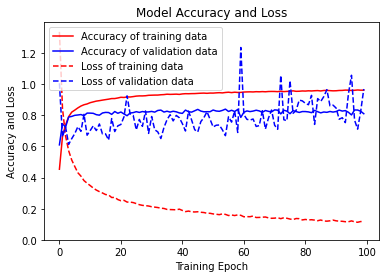

--------CLASSIFICATION REPORT--------
              precision    recall  f1-score   support

           1       0.59      0.94      0.72      1307
           2       0.74      0.84      0.79      2155
           3       0.92      0.69      0.79      1981
           4       0.56      0.38      0.45      1560
           5       0.84      0.80      0.82      1474

    accuracy                           0.73      8477
   macro avg       0.73      0.73      0.71      8477
weighted avg       0.74      0.73      0.72      8477

-------------------------------------


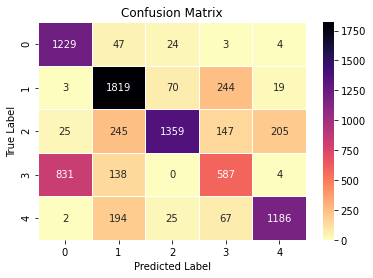

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
unique subjects ['0DXZFsYOfgqsYe0Z' '0UXFxu10k0En1vDK' '1ZstYhEKzKKfGnMW'
 'AlOXZjo87HHkXeaa' 'I1TuySg6fbJ0xeXt' 'KNmC3LADpLyH5qJA'
 'KPJOUYXzpivbLfsH' 'LdH95bTaViXIdDBZ' 'NKdnm6cN3KKAx7R4'
 'QFxq3HxMCbzs6bCt' 'WAb2Ztvv2ux95P4Q' 'YbJVcb4vFFjKKlfe'
 'bQsRwKxgJiXTzo6P' 'c9EB3mOQckRCc8Bz' 'csujYZktn88ftTTv'
 'eqUcL0HkHZfDt0Xs' 'ewpnQDEzR8hTqPRY' 'kPNKVxgIznp3Vskg'
 'psiuhPJmLIa2wC4u' 'qyP4saGxcV9UfeQI' 'zOmNofnVfbR21Y7n']
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_48 (TimeDi  (None, None, 21, 1, 64)  9280      
 stributed)                                                      
                                                                 
 time_distributed_49 (TimeDi  (None, None, 21, 1, 64)  256       
 stributed)                                              

/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
245/245 [==============================] - 12s 26ms/step - loss: 1.1531 - accuracy: 0.5603 - val_loss: 0.7392 - val_accuracy: 0.6689
Epoch 2/100
245/245 [==============================] - 6s 24ms/step - loss: 0.7574 - accuracy: 0.6993 - val_loss: 0.6112 - val_accuracy: 0.7537
Epoch 3/100
245/245 [==============================] - 6s 24ms/step - loss: 0.6396 - accuracy: 0.7577 - val_loss: 0.5295 - val_accuracy: 0.8112
Epoch 4/100
245/245 [==============================] - 6s 25ms/step - loss: 0.5591 - accuracy: 0.7989 - val_loss: 0.5050 - val_accuracy: 0.8053
Epoch 5/100
245/245 [==============================] - 6s 24ms/step - loss: 0.5052 - accuracy: 0.8229 - val_loss: 0.5072 - val_accuracy: 0.8045
Epoch 6/100
245/245 [==============================] - 6s 25ms/step - loss: 0.4644 - accuracy: 0.8362 - val_loss: 0.4601 - val_accuracy: 0.8409
Epoch 7/100
245/245 [==============================] - 6s 24ms/step - loss: 0.4344 - accuracy: 0.8481 - val_loss: 0.4974 - val_accuracy

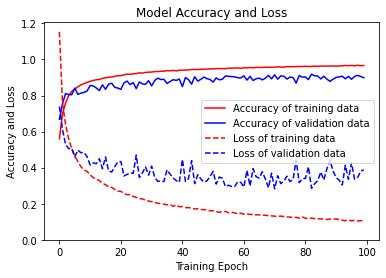

--------CLASSIFICATION REPORT--------
              precision    recall  f1-score   support

           1       0.97      0.96      0.96      2235
           2       0.76      0.79      0.78      3092
           3       0.69      0.80      0.74      2367
           4       0.88      0.77      0.82      3064
           5       0.82      0.80      0.81      3845

    accuracy                           0.82     14603
   macro avg       0.82      0.82      0.82     14603
weighted avg       0.82      0.82      0.82     14603

-------------------------------------


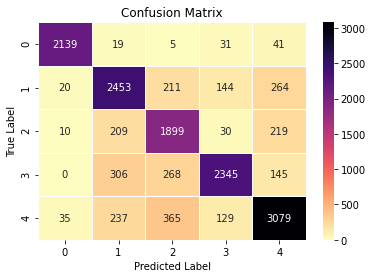

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
unique subjects ['0DXZFsYOfgqsYe0Z' '0UXFxu10k0En1vDK' '1ZstYhEKzKKfGnMW'
 'AlOXZjo87HHkXeaa' 'I1TuySg6fbJ0xeXt' 'KNmC3LADpLyH5qJA'
 'KPJOUYXzpivbLfsH' 'LdH95bTaViXIdDBZ' 'NKdnm6cN3KKAx7R4'
 'QFxq3HxMCbzs6bCt' 'WAb2Ztvv2ux95P4Q' 'YbJVcb4vFFjKKlfe'
 'bQsRwKxgJiXTzo6P' 'c9EB3mOQckRCc8Bz' 'csujYZktn88ftTTv'
 'eqUcL0HkHZfDt0Xs' 'ewpnQDEzR8hTqPRY' 'kPNKVxgIznp3Vskg'
 'psiuhPJmLIa2wC4u' 'qyP4saGxcV9UfeQI' 'zOmNofnVfbR21Y7n']
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_54 (TimeDi  (None, None, 21, 1, 64)  9280      
 stributed)                                                      
                                                                 
 time_distributed_55 (TimeDi  (None, None, 21, 1, 64)  256       
 stributed)                                              

/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
409/409 [==============================] - 14s 26ms/step - loss: 1.0004 - accuracy: 0.5959 - val_loss: 0.6154 - val_accuracy: 0.7802
Epoch 2/100
409/409 [==============================] - 10s 24ms/step - loss: 0.6334 - accuracy: 0.7572 - val_loss: 0.6506 - val_accuracy: 0.7603
Epoch 3/100
409/409 [==============================] - 10s 24ms/step - loss: 0.5011 - accuracy: 0.8186 - val_loss: 0.5968 - val_accuracy: 0.7994
Epoch 4/100
409/409 [==============================] - 10s 24ms/step - loss: 0.4258 - accuracy: 0.8495 - val_loss: 0.6501 - val_accuracy: 0.8009
Epoch 5/100
409/409 [==============================] - 10s 24ms/step - loss: 0.3772 - accuracy: 0.8681 - val_loss: 0.6145 - val_accuracy: 0.8157
Epoch 6/100
409/409 [==============================] - 10s 24ms/step - loss: 0.3449 - accuracy: 0.8820 - val_loss: 0.6553 - val_accuracy: 0.8095
Epoch 7/100
409/409 [==============================] - 10s 24ms/step - loss: 0.3213 - accuracy: 0.8899 - val_loss: 0.6195 - val_ac

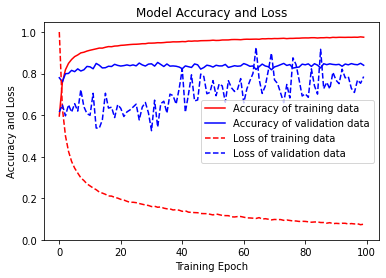

--------CLASSIFICATION REPORT--------
              precision    recall  f1-score   support

           1       0.53      0.93      0.68      2308
           2       0.70      0.89      0.79      3555
           3       0.88      0.82      0.85      2472
           4       0.76      0.36      0.49      3683
           5       0.94      0.76      0.84      3123

    accuracy                           0.73     15141
   macro avg       0.76      0.75      0.73     15141
weighted avg       0.77      0.73      0.72     15141

-------------------------------------


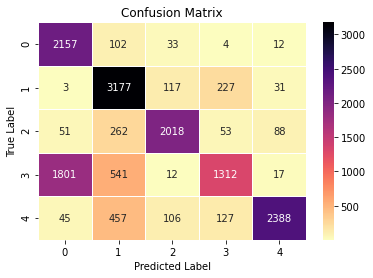

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
unique subjects ['0DXZFsYOfgqsYe0Z' '0UXFxu10k0En1vDK' '1ZstYhEKzKKfGnMW'
 'AlOXZjo87HHkXeaa' 'I1TuySg6fbJ0xeXt' 'KNmC3LADpLyH5qJA'
 'KPJOUYXzpivbLfsH' 'LdH95bTaViXIdDBZ' 'NKdnm6cN3KKAx7R4'
 'QFxq3HxMCbzs6bCt' 'WAb2Ztvv2ux95P4Q' 'YbJVcb4vFFjKKlfe'
 'bQsRwKxgJiXTzo6P' 'c9EB3mOQckRCc8Bz' 'csujYZktn88ftTTv'
 'eqUcL0HkHZfDt0Xs' 'ewpnQDEzR8hTqPRY' 'kPNKVxgIznp3Vskg'
 'psiuhPJmLIa2wC4u' 'qyP4saGxcV9UfeQI' 'zOmNofnVfbR21Y7n']
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_60 (TimeDi  (None, None, 21, 1, 64)  9280      
 stributed)                                                      
                                                                 
 time_distributed_61 (TimeDi  (None, None, 21, 1, 64)  256       
 stributed)                                             

/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
798/798 [==============================] - 25s 26ms/step - loss: 0.8318 - accuracy: 0.6778 - val_loss: 0.5438 - val_accuracy: 0.8077
Epoch 2/100
798/798 [==============================] - 20s 25ms/step - loss: 0.4700 - accuracy: 0.8354 - val_loss: 0.5629 - val_accuracy: 0.8051
Epoch 3/100
798/798 [==============================] - 21s 27ms/step - loss: 0.3778 - accuracy: 0.8712 - val_loss: 0.6077 - val_accuracy: 0.8020
Epoch 4/100
798/798 [==============================] - 19s 24ms/step - loss: 0.3275 - accuracy: 0.8900 - val_loss: 0.6108 - val_accuracy: 0.8108
Epoch 5/100
798/798 [==============================] - 19s 24ms/step - loss: 0.2918 - accuracy: 0.9020 - val_loss: 0.5873 - val_accuracy: 0.8194
Epoch 6/100
798/798 [==============================] - 19s 24ms/step - loss: 0.2668 - accuracy: 0.9106 - val_loss: 0.5553 - val_accuracy: 0.8198
Epoch 7/100
798/798 [==============================] - 19s 23ms/step - loss: 0.2480 - accuracy: 0.9174 - val_loss: 0.5720 - val_ac

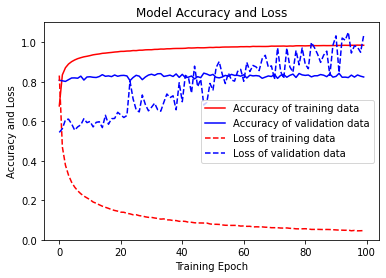

--------CLASSIFICATION REPORT--------
              precision    recall  f1-score   support

           1       0.73      1.00      0.84      5864
           2       0.91      0.78      0.84      9535
           3       0.86      0.87      0.86      6647
           4       0.66      0.75      0.70      3361
           5       0.80      0.66      0.72      8056

    accuracy                           0.80     33463
   macro avg       0.79      0.81      0.79     33463
weighted avg       0.82      0.80      0.80     33463

-------------------------------------


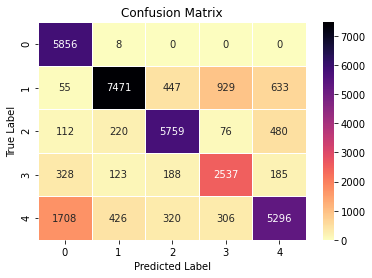

In [4]:
overlapPercents = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
# final list of subjects to be trained!!!
exclude_subjects = ['ddAeJA42PXvwthbW', 'nan',
                    'sUZBISq61Y7I5tqQ',
                    'LLZjAPTyj7muHsEf',
                    'cbOZWnI7s1y8oLD4',
                    'EUbKPOSQgjccjtvi',
                    'MMuX9YIh4NTbLZLM',
                    'PE8D53oX060qLbdX',
                    'xYdtS1F8tDyjEIgN',
                    '19AoxD1bgrDckd2p',
                    'wtyNo4LYaWXrkzA7',
                    # 'NKdnm6cN3KKAx7R4',
                    # '1ZstYhEKzKKfGnMW',
                    # 'bQsRwKxgJiXTzo6P',
                    ]

for OVERLAP_PERCENT in overlapPercents:
    gpus = tf.config.list_logical_devices('GPU')
    strategy = tf.distribute.MirroredStrategy(gpus)
    with strategy.scope():
        X, y, subjects = get_overlap_data_all_sessions(OVERLAP_PERCENT)
        # REMOVE UNWANTED SUBJECTS
        indexes = np.where(subjects == exclude_subjects)
        X = np.delete(X, indexes[0], axis=0)
        y = np.delete(y, indexes[0], axis=0)
        subjects = np.delete(subjects, indexes[0], axis=0)
        print('unique subjects', np.unique(subjects))
        # END REMOVE UNWANTED SUBJECTS

        # AUGMENT DATA
        resultant_acc = compute_resultant_acceleration(X)
        resultant_gyro = compute_resultant_gyro(X)
        resultant_angle = compute_resultant_angle(X)
        resultant_acc = resultant_acc.reshape(
            resultant_acc.shape[0], resultant_acc.shape[1], 1)
        resultant_gyro = resultant_gyro.reshape(
            resultant_gyro.shape[0], resultant_gyro.shape[1], 1)
        resultant_angle = resultant_angle.reshape(
            resultant_angle.shape[0], resultant_angle.shape[1], 1)
        X = np.concatenate((X, resultant_acc), axis=2)
        X = np.concatenate((X, resultant_gyro), axis=2)
        X = np.concatenate((X, resultant_angle), axis=2)
        # AUGMENT DATA END

        # print('UNIQUE subjects:', np.unique(subjects))
        X_train, X_test, y_train, y_test, y_train_non_encoded, y_test_non_encoded = split_test_train_by_subjects(
            X, y, subjects, train_percent=0.8)

        model, history = train_2dcnn_lstm_model(
            X_train, y_train, X_test, overlap_percent=OVERLAP_PERCENT, batch_size=128, epochs=100)

        save_history(history, OVERLAP_PERCENT)
        n_steps, n_length = 4, 32
        X_test = X_test.reshape((X_test.shape[0], n_steps, n_length, 12))
        evaluation_history = model.evaluate(
            X_test, y_test, batch_size=128, verbose=1)
        save_test_history(evaluation_history, OVERLAP_PERCENT)
        save_accuracy_loss_figure(history, OVERLAP_PERCENT)
        validations, predictions = compute_validations_predictions(
            model, X_test, y_test)
        save_classification_report(validations, predictions, OVERLAP_PERCENT)
        save_confusion_matrix_figure(
            validations, predictions, OVERLAP_PERCENT, sns)


In [ ]:
# def build_final_cnn_lstm(n_features, n_outputs):
#     model = Sequential()

#     model.add(TimeDistributed(Conv2D(filters=64, kernel_size=n_features),
#                               input_shape=(None, 32, n_features, 1)))
#     model.add(TimeDistributed(BatchNormalization()))
#     model.add(TimeDistributed(Activation('relu')))
#     model.add(TimeDistributed(Dropout(0.5)))

#     model.add(TimeDistributed(GlobalAveragePooling2D()))
#     model.add(TimeDistributed(Flatten()))

#     model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
#     model.add(Dropout(0.5))
#     model.add(Dense(32, activation='relu'))

#     model.add(Dense(n_outputs, activation='softmax'))
#     model.summary()
#     print("Model size: ", calculate_model_size(model))
#     return model